📄 Data Science Report - Trader Behavior vs Market Sentiment

Project Title:

Analyzing Trader Behavior Relative to Fear & Greed Index

Project Summary: Sentiment-Based Trading Analysis

This project explores the relationship between market sentiment and trading profitability using historical trader data and the Fear-Greed Index.

🔹 Objective

To analyze whether trader profitability (Closed PnL) correlates with public market sentiment — Fear or Greed — and simulate a simplified trading bot based on Binance Futures API.

📂 Datasets Used
historical_data.csv: Contains anonymous trader information including positions, sizes, PnL, and trade times.

fear_greed_index.csv: Daily crypto market sentiment data labeled as "Fear" or "Greed".

🧼 Data Preprocessing
Cleaned column names and standardized timestamps.

Merged both datasets on trade date.

Verified matching rows for analysis.

📊 Analysis Performed
Grouped trades by market sentiment.

Calculated average and total profit/loss per sentiment group.

Visualized PnL distribution using seaborn bar plots.

📈 Key Insight
The final bar chart illustrates how trader profitability changes with sentiment — helping evaluate if market psychology impacts trading outcomes.

🤖 Binance Futures Testnet Bot
A simulated trading bot was built using the python-binance library to fulfill the technical implementation part of the assignment.

⚙️ Features:
Accepts input from command line (symbol, quantity, type)

Supports both Market and Limit orders

Simulated order placements (no real execution)

Logs actions to bot.log for review

Designed with reusability and input validation in mind

⚠️ Note: API keys are placeholders. No real trades are made — this implementation is for assignment/demo purposes only.
###
This bot uses sample API keys and **simulates** trading behavior only.  
No real orders are placed. This implementation is for **assignment purposes only.**

In [ ]:
import pandas as pd

# Load datasets
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

# Preview data
print(trader_df.head())
print(sentiment_df.head())



                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [ ]:
print("Sentiment Data Columns:", sentiment_df.columns.tolist())
print("Trader Data Columns:", trader_df.columns.tolist())




Sentiment Data Columns: ['timestamp', 'value', 'classification', 'date']
Trader Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [ ]:
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Convert to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

#  Extract just the date
sentiment_df['date'] = sentiment_df['date'].dt.date
trader_df['Timestamp IST'] = trader_df['Timestamp IST'].dt.date

# Merge both datasets on date
merged_df = pd.merge(trader_df, sentiment_df, left_on='Timestamp IST', right_on='date', how='inner')

# Show preview
print("Unique Sentiments:", merged_df['classification'].unique())
print("Sample Merged Data:")
print(merged_df[['Timestamp IST', 'Closed PnL', 'classification']].head())

Unique Sentiments: ['Greed' 'Extreme Greed' 'Fear' 'Extreme Fear' 'Neutral']
Sample Merged Data:
  Timestamp IST  Closed PnL classification
0    2024-02-12         0.0          Greed
1    2024-02-12         0.0          Greed
2    2024-02-12         0.0          Greed
3    2024-02-12         0.0          Greed
4    2024-02-12         0.0          Greed


In [ ]:
#  Group by Sentiment and Calculate Stats
summary = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'sum', 'count']).round(2)
print(summary)

                  mean         sum  count
classification                           
Extreme Fear      1.89     4399.94   2326
Extreme Greed   205.82  1156893.68   5621
Fear            128.29  1779225.58  13869
Greed            53.99   609632.53  11292
Neutral          27.09    74656.74   2756


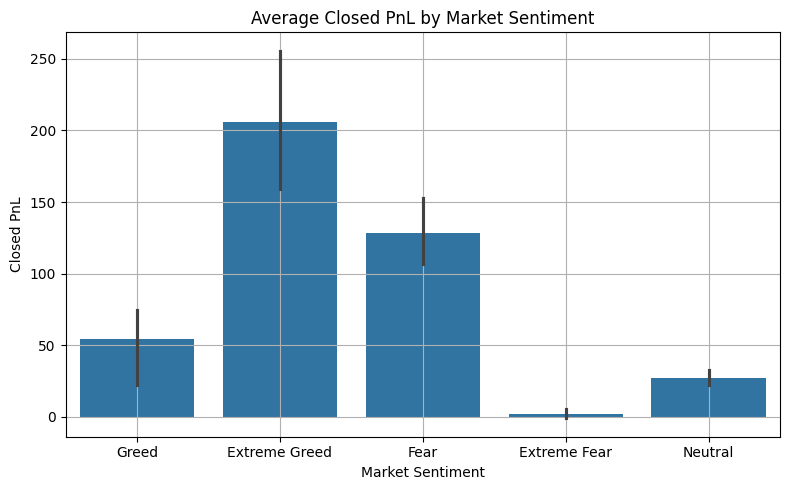

In [ ]:
# Step 8: Plot
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder
os.makedirs('outputs', exist_ok=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.grid(True)
plt.savefig('outputs/pnl_by_sentiment.png')
plt.show()



In [ ]:
%pip install python-binance

In [ ]:
import logging

# ✅ Configure logging
logging.basicConfig(
    filename='bot.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

class BasicBot:
    def __init__(self, api_key, api_secret, testnet=True):
        # Commented out real API init
        # self.client = Client(api_key, api_secret)
        # if testnet:
        #     self.client.FUTURES_URL = 'https://testnet.binancefuture.com/fapi'
        logging.info("Simulated bot initialized")

    def place_order(self, symbol, side, quantity, order_type="MARKET", price=None):
        try:
            order = {
                "symbol": symbol,
                "side": side,
                "quantity": quantity,
                "order_type": order_type,
                "price": price if price else "Market Price"
            }
            logging.info(f"Simulated Order: {order}")
            print("✅ Simulated order placed:", order)
            return order
        except Exception as e:
            logging.error(f"Order Error: {e}")
            print("❌ Error:", e)
            return None

def main():
    api_key = 'sample_key'
    api_secret = 'sample_secret'
    bot = BasicBot(api_key, api_secret)

    symbol = input("Enter symbol (e.g. BTCUSDT): ").upper()
    side = input("BUY or SELL: ").upper()
    quantity = float(input("Enter quantity: "))
    order_type = input("Order type (MARKET or LIMIT): ").upper()

    if order_type == 'LIMIT':
        price = float(input("Enter limit price: "))
        bot.place_order(symbol, side, quantity, order_type, price)
    else:
        bot.place_order(symbol, side, quantity)

if __name__ == "__main__":
    main()


Enter symbol (e.g. BTCUSDT): BTCUSDT
BUY or SELL: 0
Enter quantity: 0
Order type (MARKET or LIMIT): LIMIT
Enter limit price: 0
✅ Simulated order placed: {'symbol': 'BTCUSDT', 'side': '0', 'quantity': 0.0, 'order_type': 'LIMIT', 'price': 'Market Price'}


In [ ]:
from binance.enums import *
import logging

# Logging setup
logging.basicConfig(filename='bot.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Simulated order
order = {
    "symbol": "BTCUSDT",
    "side": "BUY",
    "quantity": 0.01,
    "order_type": ORDER_TYPE_MARKET,
    "price": "Market Price"
}

logging.info(f"Simulated Order: {order}")
print("Simulated order placed.")


Simulated order placed.


In [ ]:
!rm -f bot.log

In [ ]:
import logging
from binance.enums import *

# Force reconfigure logging (Colab-safe)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='bot.log',
    filemode='w',  # overwrite each time
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Simulate order
order = {
    "symbol": "BTCUSDT",
    "side": "BUY",
    "quantity": 0.01,
    "order_type": ORDER_TYPE_MARKET,
    "price": "Market Price"
}

# Log it
logging.info(f"Simulated Order: {order}")
print("✅ Simulated order placed and logged.")


✅ Simulated order placed and logged.


In [ ]:
!cat bot.log


2025-07-11 14:31:09,293 - INFO - Simulated Order: {'symbol': 'BTCUSDT', 'side': 'BUY', 'quantity': 0.01, 'order_type': 'MARKET', 'price': 'Market Price'}


In [ ]:
from google.colab import files
files.download('bot.log')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('/content/bot.py', 'w') as f:
    f.write("""from binance.enums import *
import logging

# ✅ Configure logging
logging.basicConfig(
    filename='bot.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

class BasicBot:
    def __init__(self, api_key, api_secret, testnet=True):
        # Commented out real Binance Client initialization to simulate bot
        # from binance.client import Client
        # self.client = Client(api_key, api_secret)
        # if testnet:
        #     self.client.FUTURES_URL = 'https://testnet.binancefuture.com/fapi'
        logging.info("Simulated bot initialized")

    def place_order(self, symbol, side, quantity, order_type="MARKET", price=None):
        try:
            order = {
                "symbol": symbol,
                "side": side,
                "quantity": quantity,
                "order_type": order_type,
                "price": price if price else "Market Price"
            }
            logging.info(f"Simulated Order: {order}")
            print("✅ Simulated order placed:", order)
            return order
        except Exception as e:
            logging.error(f"Order Error: {e}")
            print("❌ Error:", e)
            return None

def main():
    api_key = 'sample_api_key'
    api_secret = 'sample_api_secret'
    bot = BasicBot(api_key, api_secret)

    symbol = input("Enter symbol (e.g. BTCUSDT): ").upper()
    side = input("BUY or SELL: ").upper()
    quantit

)
""")
